## Observations and Insights 

### Study details
For this study **249 mice** identified with SCC tumor growth were treated through a variety of **10 drug regimens**, over the course of **45 days**, tumor development was observed and measured.

#### Observations

1. From the total of 249 mice studied for the tumor study **gender was equally divided.**
2. An average of **25 mice** where studied *for each one of the drug regimens*. 
3. In the drug regimen vs timepoint analysis, we can tell that the **Infubinol drug shows an important drop of mice count over the course of the study**, ending with less than half of the mice.
4. Looking at the data for the 4 drug regimens of interest (Capomulin, Ramicane, Infubinol, Ceftamin), we can observe **Capomulin and Ramicane performed better when looking at the final tumor volume**. And we can see for **Infubinol** even when did not perfomed well **there is an outlier that shows a mouse with a tumor value in the range of the mean of Capomulin and Ramicane.**
5. Correlation coefficient calculated for Capomulin between the weight and size tumor shows a value of $r >= 0.7$ which tell us there is a stronght correlation between the 2 values.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")


In [2]:
mouse_metadata.shape

(249, 5)

In [3]:
mouse_metadata.dtypes

Mouse ID        object
Drug Regimen    object
Sex             object
Age_months       int64
Weight (g)       int64
dtype: object

In [4]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
study_results.shape

(1893, 4)

In [6]:
study_results.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [7]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [8]:
combined_df.shape

(1893, 8)

In [9]:
combined_df.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [10]:
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
# Checking the number of mice in the DataFrame.
combined_df["Mouse ID"].nunique()

249

In [12]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_df["Mouse ID"][combined_df.duplicated(['Mouse ID','Timepoint'])]

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [13]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_df[combined_df.duplicated(['Mouse ID','Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates(['Mouse ID','Timepoint'], keep= 'first')
clean_df.shape

(1888, 8)

In [15]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

249

## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Group data by Drug
grouped_drug = clean_df.groupby(['Drug Regimen'])
#Do calculations
tumor_vol_mean = grouped_drug["Tumor Volume (mm3)"].mean()
tumor_vol_median = grouped_drug["Tumor Volume (mm3)"].median()
tumor_vol_var = grouped_drug["Tumor Volume (mm3)"].var()
tumor_vol_std = grouped_drug["Tumor Volume (mm3)"].std()
tumor_vol_sem = grouped_drug["Tumor Volume (mm3)"].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.
#Create dataframe
stats_summary = pd.DataFrame({"Mean": tumor_vol_mean,
                              "Median":tumor_vol_median,
                              "Variance":tumor_vol_var,
                              "Std Dev":tumor_vol_std,
                              "SEM":tumor_vol_sem
                             })
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Display summary
stats_summary

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

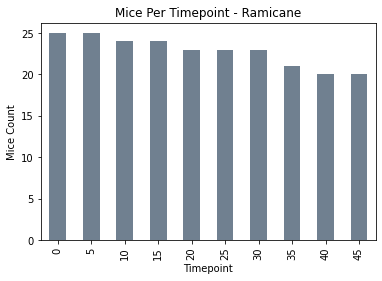

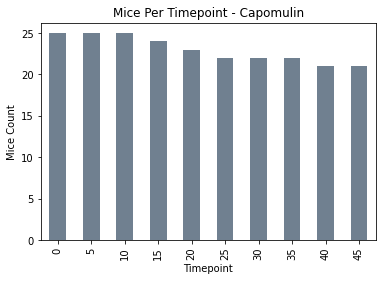

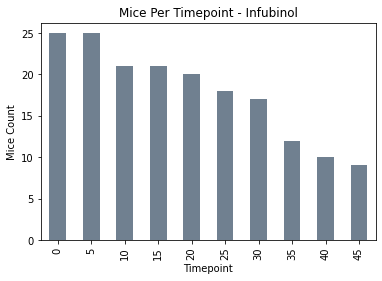

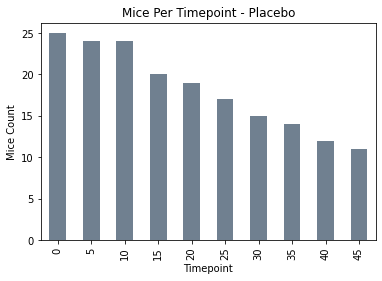

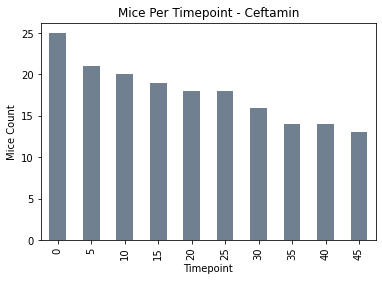

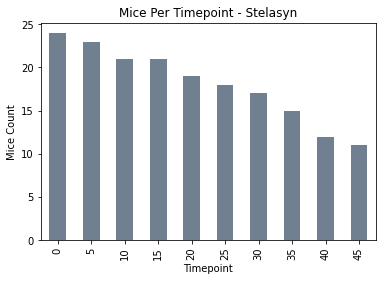

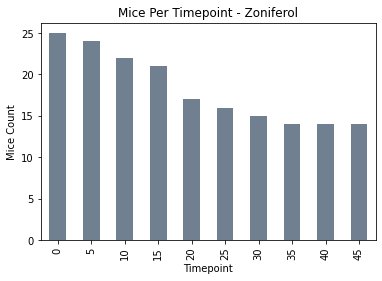

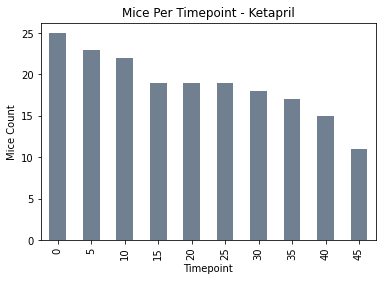

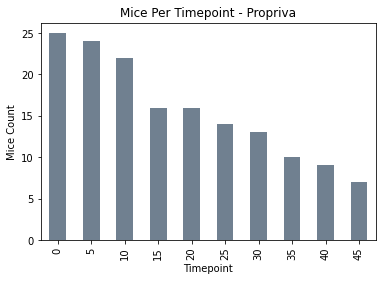

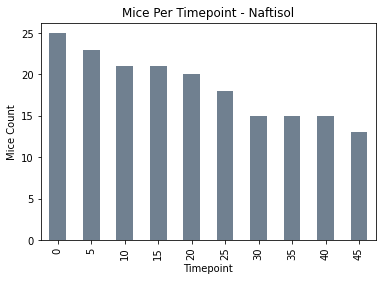

In [17]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
regimens=clean_df['Drug Regimen'].unique()
for reg in regimens:
    mice_bar_df=clean_df.loc[clean_df['Drug Regimen']==reg]
    mice_per_time = mice_bar_df.groupby('Timepoint')['Mouse ID'].nunique()
    mice_per_time.plot(kind='bar', color='slategrey')
    plt.title(f"Mice Per Timepoint - {reg}")
    plt.xlabel("Timepoint")
    plt.ylabel("Mice Count")
    plt.show()

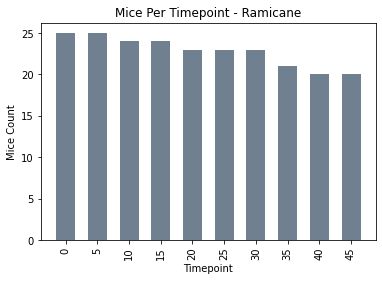

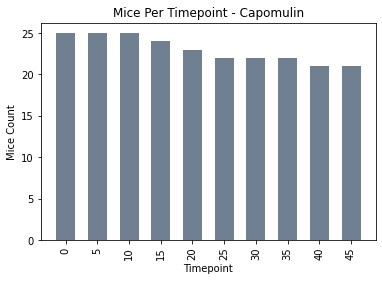

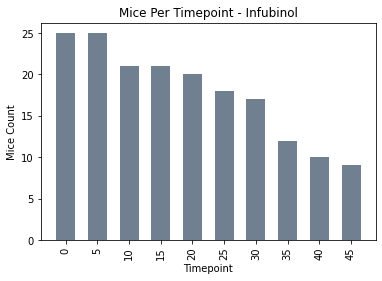

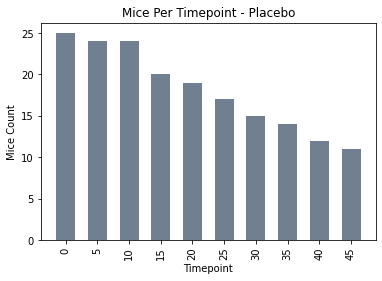

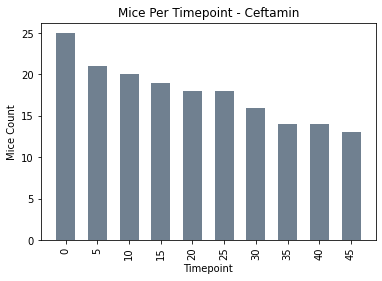

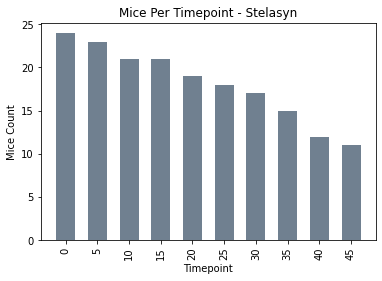

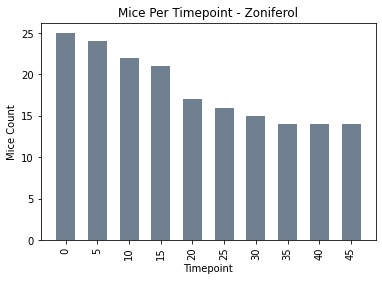

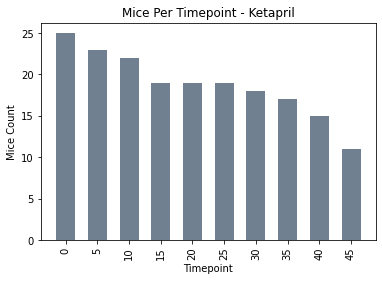

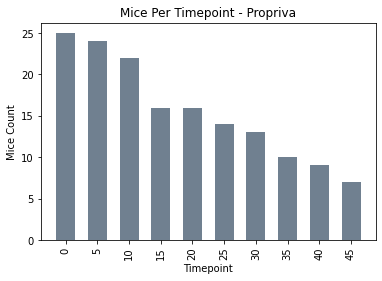

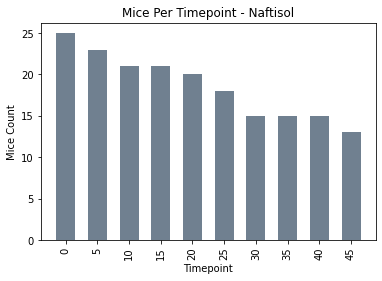

In [18]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x_axis = clean_df['Timepoint'].unique()
regimens=clean_df['Drug Regimen'].unique()
for reg in regimens:
    mice_bar_df=clean_df.loc[clean_df['Drug Regimen']==reg]
    mices = mice_bar_df.groupby('Timepoint')['Mouse ID'].nunique()
    plt.bar(x_axis, mices, width=3, color='slategrey')
    plt.xticks(x_axis, rotation=90)
    plt.xlabel('Timepoint')
    plt.ylabel('Mice Count')
    plt.title(f"Mice Per Timepoint - {reg}")
    plt.show()

## Pie Plots

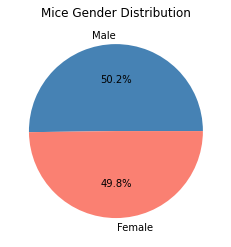

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_sex = clean_df.groupby('Sex')['Mouse ID'].nunique()
mice_sex = mice_sex.sort_values(ascending=False)
colors = ["steelblue", "salmon"]
mice_sex.plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title('Mice Gender Distribution')
plt.ylabel('')
plt.show()

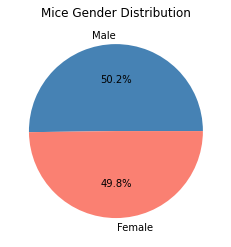

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_sex_label = clean_df['Sex'].unique()
plt.pie(mice_sex, labels=mice_sex_label, autopct='%1.1f%%', colors=colors)
plt.title('Mice Gender Distribution')
plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Create simplified df for stats
stats_df=clean_df[['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']]
#Create a list to filter regimens
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
#Filter df with regimens and sort it
stats_df=stats_df.loc[stats_df['Drug Regimen'].isin(regimens)]
stats_df=stats_df.sort_values(['Mouse ID','Drug Regimen','Timepoint'])
#Group by Mouse and Regimen and get Tumor Volume from Last data point
stats_df=stats_df.groupby(['Mouse ID','Drug Regimen'])['Tumor Volume (mm3)'].last().reset_index()
#Validation check
 #stats_df.loc[stats_df['Mouse ID'] == 'b487']
#Display df
stats_df


,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,38.407618
4,a444,Ramicane,43.047543
...,...,...,...
95,y769,Ceftamin,68.594745
96,y793,Capomulin,31.896238
97,y865,Ceftamin,64.729837
98,z578,Ramicane,30.638696


In [22]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.

#Pull data for tumor volume
t_volume=stats_df['Tumor Volume (mm3)']
#Stat calculations
quartiles = t_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
#Display calculations
print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")
#Calculate bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
#Display bouds
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume is: 37.187743802499995
The upper quartile of Tumor Volume is: 59.930261755000004
The interquartile range of Tumor Volume is: 22.74251795250001
The the median of Tumor Volume is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


In [23]:
#List outliers
stats_df.loc[(stats_df['Tumor Volume (mm3)']<lower_bound) | (stats_df['Tumor Volume (mm3)']>upper_bound)]

,Mouse ID,Drug Regimen,Tumor Volume (mm3)


In [24]:
#List Lower bound outliers
stats_df.loc[(stats_df['Tumor Volume (mm3)']<lower_bound)].count()

Mouse ID              0
Drug Regimen          0
Tumor Volume (mm3)    0
dtype: int64

In [25]:
#List Upper bound outliers
stats_df.loc[(stats_df['Tumor Volume (mm3)']>upper_bound)].count()

Mouse ID              0
Drug Regimen          0
Tumor Volume (mm3)    0
dtype: int64

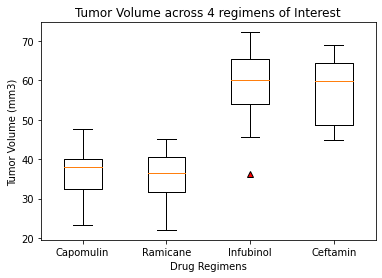

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#Get data for each boxplot
regimen_1=stats_df.loc[stats_df['Drug Regimen']=='Capomulin']['Tumor Volume (mm3)']
regimen_2=stats_df.loc[stats_df['Drug Regimen']=='Ramicane']['Tumor Volume (mm3)']
regimen_3=stats_df.loc[stats_df['Drug Regimen']=='Infubinol']['Tumor Volume (mm3)']
regimen_4=stats_df.loc[stats_df['Drug Regimen']=='Ceftamin']['Tumor Volume (mm3)']
#Generate plot
data = [regimen_1, regimen_2, regimen_3, regimen_4]
red_triangle = dict(markerfacecolor='r', marker='^')
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume across 4 regimens of Interest')
ax1.boxplot(data, flierprops=red_triangle)
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimens')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

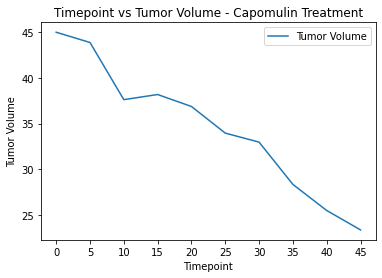

In [27]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Create dataframe for line plot
lineplot_df=clean_df[['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']]
#Set variables to plot
regimen_to_plot='Capomulin'
mice_to_plot='s185'
#Get x and y axis
x_axis=lineplot_df.loc[(lineplot_df['Drug Regimen']==regimen_to_plot) & (lineplot_df['Mouse ID']==mice_to_plot)]['Timepoint']
y_axis=lineplot_df.loc[(lineplot_df['Drug Regimen']==regimen_to_plot) & (lineplot_df['Mouse ID']==mice_to_plot)]['Tumor Volume (mm3)']
#Plot data
plt.plot(x_axis, y_axis, label='Tumor Volume')
plt.legend(loc='best')
plt.xticks(x_axis)
plt.title('Timepoint vs Tumor Volume - Capomulin Treatment')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.show()

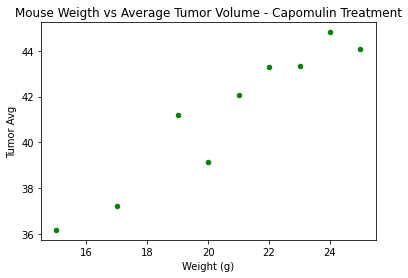

In [28]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#Set variables to plot
regimen_to_plot='Capomulin'
#Create filtered dataframe for line plot
scatterplot_df=clean_df[['Mouse ID','Drug Regimen','Weight (g)','Tumor Volume (mm3)']]
scatterplot_df=scatterplot_df.loc[scatterplot_df['Drug Regimen']==regimen_to_plot]
#Group data by Weight
scatt_group = scatterplot_df.groupby(['Weight (g)'])
#Do calculations
tumor_v_avg = scatt_group["Tumor Volume (mm3)"].mean()
lineplot_df = pd.DataFrame({'Tumor Avg':tumor_v_avg})
lineplot_df = lineplot_df.reset_index()
#Create scatter plot
lineplot_df.plot(kind='scatter', x='Weight (g)', y='Tumor Avg', color='green')
plt.title('Mouse Weigth vs Average Tumor Volume - Capomulin Treatment')
plt.show()

## Correlation and Regression

The Pearson correlation coefficient is 0.95
The r-value is: 0.950524396185527
The r-squared is: 0.9034966277438606


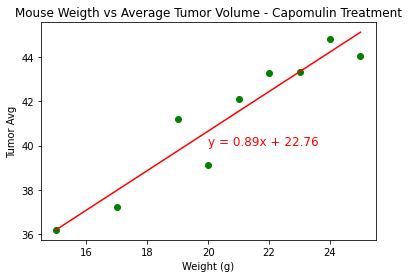

In [29]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Import dependency
#from scipy.stats import linregress

#Assign x y values
x_values = lineplot_df['Weight (g)']
y_values = lineplot_df['Tumor Avg']
#Do calculations
#Calculate correlation coefficient
correlation = st.pearsonr(x_values,y_values)
print(f"The Pearson correlation coefficient is {round(correlation[0],2)}")
#Calculate linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Create plot
plt.scatter(x_values,y_values, color='green')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=12,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Avg')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.title('Mouse Weigth vs Average Tumor Volume - Capomulin Treatment')
plt.show()